In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from  sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [69]:
data = pd.read_csv('./data/web-page-phishing.csv')
df = pd.DataFrame(data)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100077 entries, 0 to 100076
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   url_length      100077 non-null  int64
 1   n_dots          100077 non-null  int64
 2   n_hypens        100077 non-null  int64
 3   n_underline     100077 non-null  int64
 4   n_slash         100077 non-null  int64
 5   n_questionmark  100077 non-null  int64
 6   n_equal         100077 non-null  int64
 7   n_at            100077 non-null  int64
 8   n_and           100077 non-null  int64
 9   n_exclamation   100077 non-null  int64
 10  n_space         100077 non-null  int64
 11  n_tilde         100077 non-null  int64
 12  n_comma         100077 non-null  int64
 13  n_plus          100077 non-null  int64
 14  n_asterisk      100077 non-null  int64
 15  n_hastag        100077 non-null  int64
 16  n_dollar        100077 non-null  int64
 17  n_percent       100077 non-null  int64
 18  n_re

In [71]:
correlation_matrix = df.corr()

<Axes: >

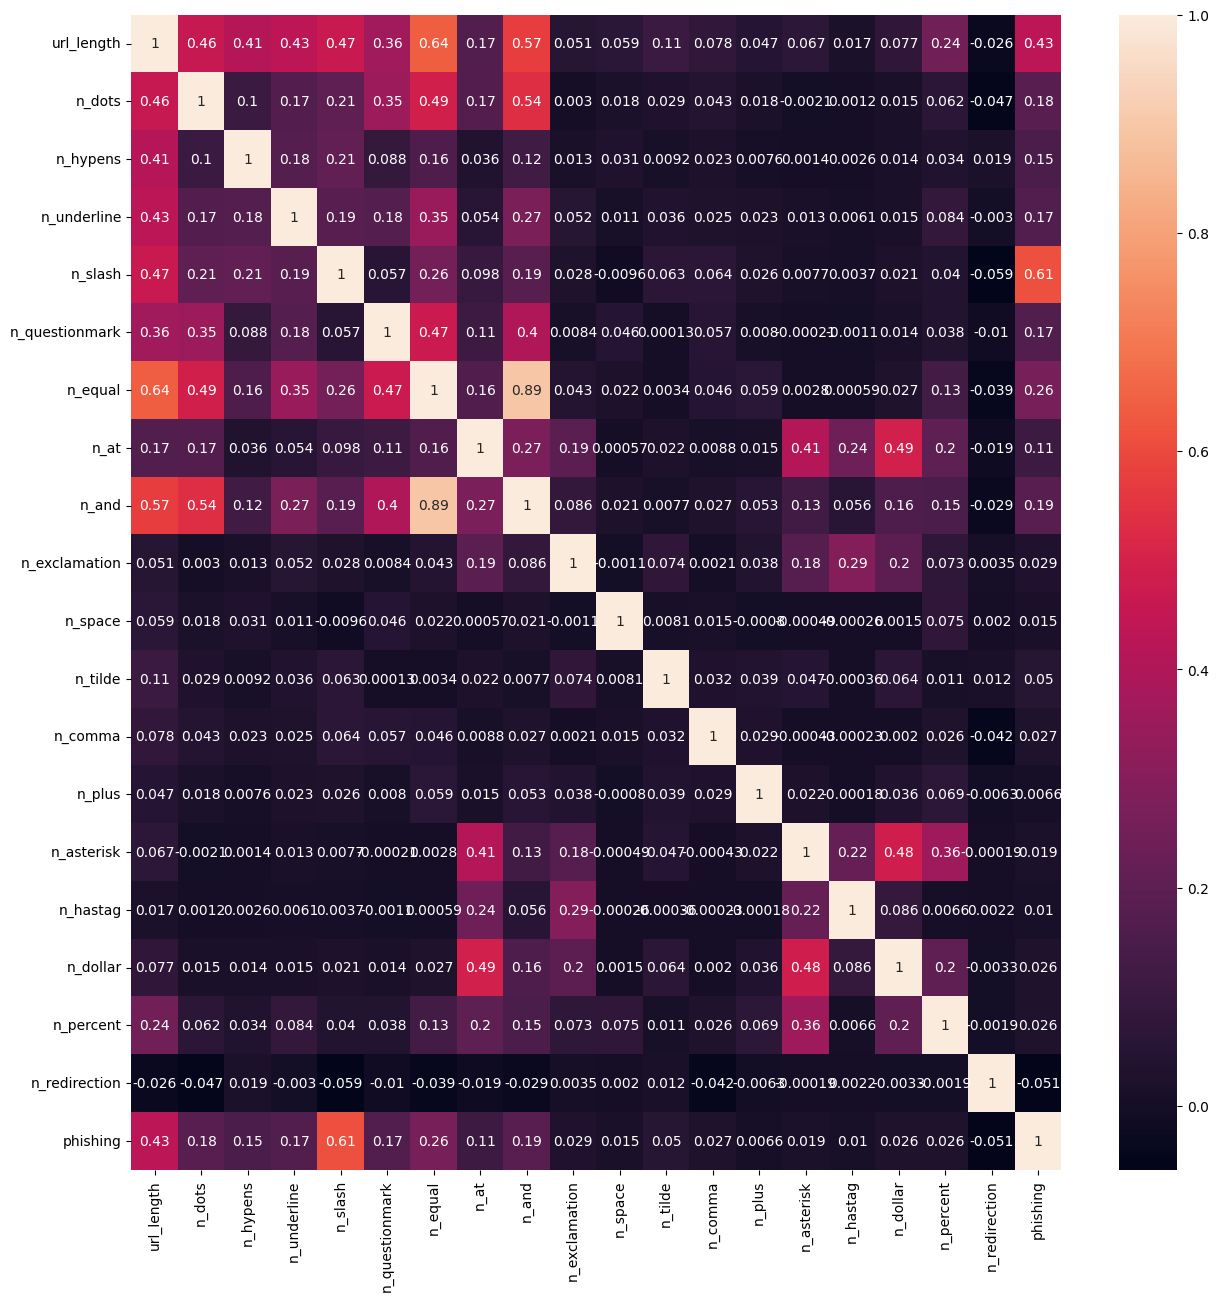

In [72]:
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True)

In [73]:
correlation_with_phising = correlation_matrix['phishing'].sort_values(ascending=False)
print(correlation_with_phising)

phishing          1.000000
n_slash           0.611472
url_length        0.430125
n_equal           0.260462
n_and             0.189173
n_dots            0.181884
n_underline       0.168305
n_questionmark    0.167045
n_hypens          0.150413
n_at              0.109056
n_tilde           0.049616
n_exclamation     0.029358
n_comma           0.026512
n_percent         0.026117
n_dollar          0.025799
n_asterisk        0.019092
n_space           0.014757
n_hastag          0.010257
n_plus            0.006619
n_redirection    -0.050822
Name: phishing, dtype: float64


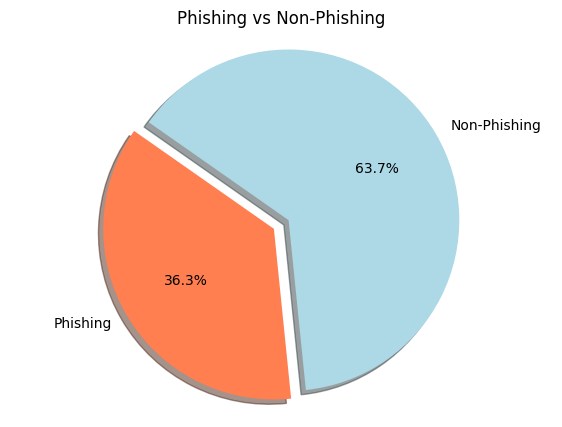

In [74]:
phishing_sum = (df['phishing'] == 1).sum()
non_phishing_sum = len(df) - phishing_sum

labels = ['Phishing', 'Non-Phishing']
sizes = [phishing_sum, non_phishing_sum]
colors = ['coral', 'lightblue']
explode = (0.1, 0)

plt.figure(figsize=(7, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=145, shadow=True)
plt.title('Phishing vs Non-Phishing')
plt.axis('equal')
plt.show()

In [75]:
X = df.drop('phishing', axis=1)
y = df['phishing']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
models = [LogisticRegression(random_state=42, max_iter=500), SVC(), KNeighborsClassifier(), GradientBoostingClassifier(random_state=42), RandomForestClassifier(random_state=42)]
scores = []

for i, model in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    scores.append({
        "Model:": model.__class__.__name__,
        "Accuracy:": accuracy,
        "Precision (0):": report['0']['precision'],
        "Recall (0):": report['0']['recall'],
        "F1 Score (0):": report['0']['f1-score'],
        "Precision (1):": report['1']['precision'],
        "Recall (1):": report['1']['recall'],
        "F1 Score (1):": report['1']['f1-score']
    })
scores_df = pd.DataFrame(scores)

In [80]:
scores_df

,Model:,Accuracy:,Precision (0):,Recall (0):,F1 Score (0):,Precision (1):,Recall (1):,F1 Score (1):
0,LogisticRegression,0.856964,0.851979,0.937392,0.892647,0.868486,0.717409,0.785752
1,SVC,0.866807,0.875337,0.921247,0.897705,0.849669,0.772342,0.809162
2,KNeighborsClassifier,0.886341,0.899379,0.924240,0.911640,0.861920,0.820579,0.840742
3,GradientBoostingClassifier,0.882994,0.909393,0.905812,0.907599,0.837676,0.843400,0.840528
4,RandomForestClassifier,0.892136,0.908900,0.922429,0.915615,0.861832,0.839574,0.850557
